In [1]:
import numpy as np
import pylab as plt
import netCDF4 as nc
import os

In [2]:
#Loop over the columns 
N = 4
column_data = []
for n in range(N):
    path = './couple_' + str(n)
    path = os.path.join(path, 'rico')
    path = os.path.join(path, 'stats.nc')
    column_data.append(nc.Dataset(path, 'r'))

0.03403509688286109
0.03419063544504574
0.034485859551472195
0.03056194694574251


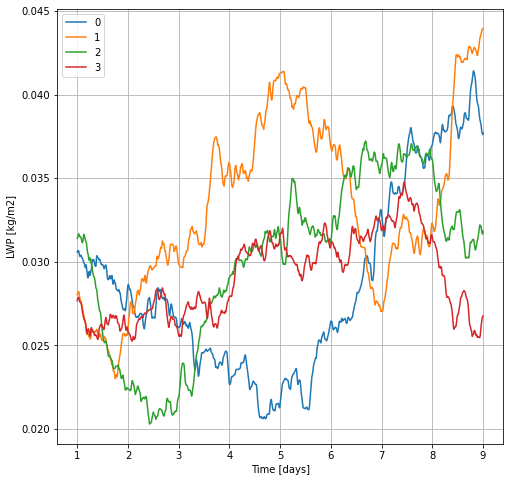

In [12]:
var = 'LWP'
#plt.figure()
lwp_mean = []
data_pack = []
plt.figure(figsize=(8,8))
Nt = 60 * 24 * 2
for n in range(N):
    #plt.subplot(4,1,n+1)
    micro = column_data[n]['MicroBase']
    data = micro['timeseries'][var][:]
    lwp_mean.append(np.mean(data[-60*24*4:]))
    data = np.convolve(data, np.ones(Nt)/Nt, mode='valid')
    time = micro['timeseries']['time'][:]
    time = np.convolve(time, np.ones(Nt)/Nt, mode='valid')
    plt.plot(time/86400,data,label=str(n))
    data_pack.append(data)
    plt.xlabel('Time [days]')
    plt.ylabel('LWP [kg/m2]')
    print(np.mean(data[-60*24*3:]))

plt.legend()
plt.grid()
plt.savefig('qc.png')
    #plt.ylim(0.0, 0.41)

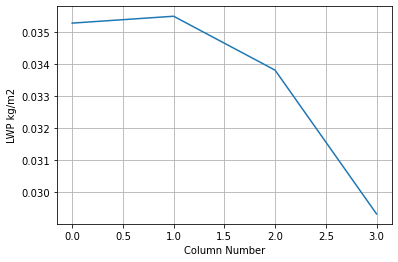

In [4]:
plt.figure()
plt.ylabel('LWP kg/m2')
plt.xlabel('Column Number')
plt.plot(lwp_mean)
plt.grid()
plt.savefig('lwp.png')

In [5]:
def convert_to_array(data_pack):
    
    min_len = 0
    for d in data_pack:
        min_len = np.maximum(len(d), min_len)
    
    
    #Now stack the array
    array = None
    for d in data_pack:

        if array is None:
            array = d
        else:
            array = np.vstack((array[:min_len],d))
    
    print(np.shape(array))    
    return



#print(data_pack)
#convert_to_array(data_pack)

-2.1628159487501266
-2.7791139909105085
-2.350545750719117
-2.2696426368404556


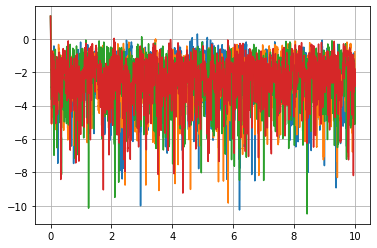

In [6]:
grp = 'VelocityState'
var = 'u_min'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = micro['timeseries'][var][:]
    time = micro['timeseries']['time'][:]
    plt.plot(time/86400,data)
    data_pack.append(data)
    
    print(np.mean(data[-60:]))
    
plt.grid()

5.106139613804474
5.108772078415996
5.1064808042433345
5.104297000099661


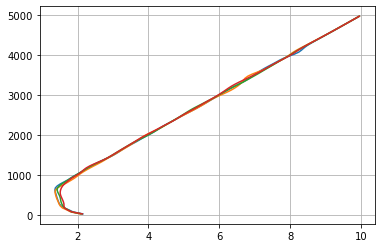

In [7]:
grp = 'VelocityState'
var = 'u'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-60:,:], axis=0)
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-360:]))
    
plt.grid()
plt.savefig('u.png')

6.481063464546495e-06
7.415218032710254e-06
6.537441301997039e-06
5.897817947910544e-06


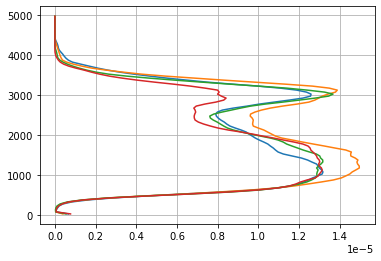

In [16]:
grp = 'ScalarState'
var = 'qc'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-60*24*5:,:], axis=0)
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-60*24*5:]))
    
plt.grid()
plt.savefig('qc2.png')

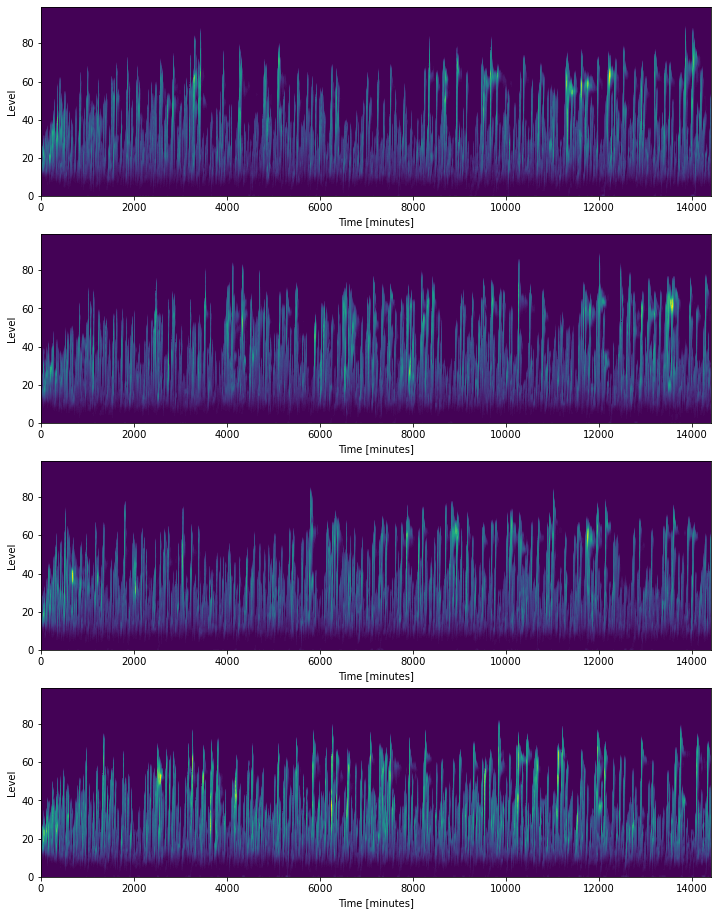

In [9]:
grp = 'ScalarState'
var = 'qc'
plt.figure(figsize=(12,16))
for n in range(N):
    plt.subplot(4,1,n+1)
    micro = column_data[n][grp]
    data = micro['profiles'][var][:,:]
    #z = micro['profiles']['z'][:]
    plt.contourf(data.T, 100)
    plt.xlabel('Time [minutes]')
    plt.ylabel('Level')
plt.savefig('qc_cross.png')


    